In [2]:
import numpy as np 
from PIL import Image
import imageio
import os
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = 'YALE/unpadded/' # path to the database
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

# data dimension
h = 116 # hight
w = 98 # width
D = h * w
N = len(states)*15
K = 100

X = np.zeros((D, N))
Y = np.zeros(N)

cnt = 0
for person_id in range(1, 16):
    for state in states:
        fn = os.path.join(path, prefix + str(person_id).zfill(2) + '.' + state + surfix)
        X[:, cnt] = misc.imread(fn).reshape(D)
        Y[cnt] = person_id
        cnt += 1



In [4]:
from sklearn.decomposition import PCA
pca = PCA(165 - 15)
pca.fit(X.T)
U_PCA = pca.components_.T
muPCA = pca.mean_.reshape(D, 1)
print("U_PCA:", U_PCA.shape)
print("mu_PCA: ", muPCA.shape)

U_PCA: (11368, 150)
mu_PCA:  (11368, 1)


In [5]:
print("X:", X.shape)
Z = U_PCA.T.dot(X - muPCA)
print("Z: ", Z.shape)

X: (11368, 165)
Z:  (150, 165)


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(Z.T, Y)
W = clf.coef_
W.shape

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(15, 150)

In [7]:
print("U_PCA:", U_PCA.shape)
print("W: ", W.shape)
projectedMatrix = U_PCA.dot(W.T)
print("projectedMatrix: ", projectedMatrix.shape)

U_PCA: (11368, 150)
W:  (15, 150)
projectedMatrix:  (11368, 15)


0


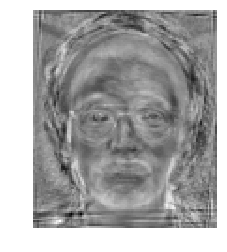

1


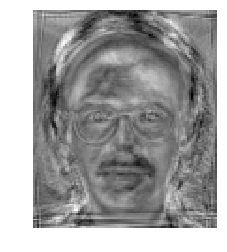

2


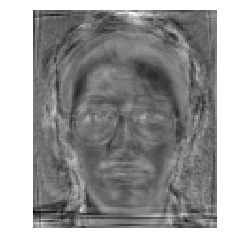

3


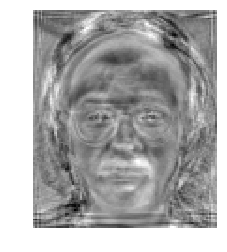

4


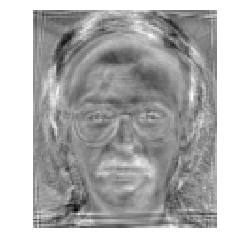

5


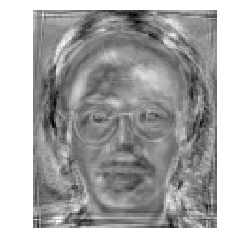

6


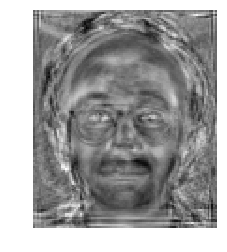

7


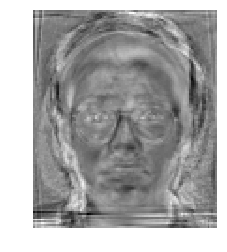

8


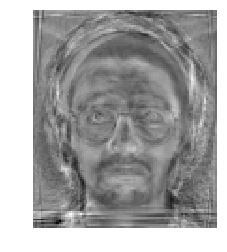

9


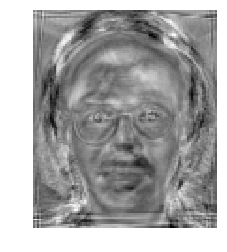

10


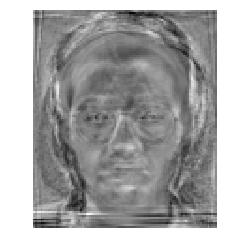

11


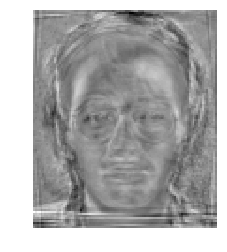

12


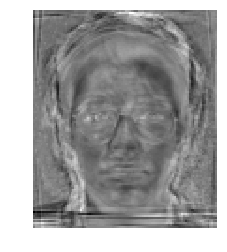

13


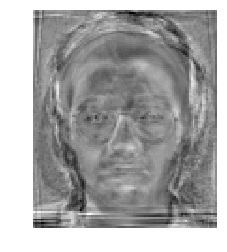

14


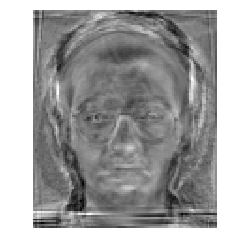

In [8]:
for i in range(15):
    print(i)
    a = projectedMatrix[:,i]
    f1 = plt.imshow(a.reshape(h, w), interpolation='nearest')
    plt.axis('off')
    plt.gray()
    plt.show()

img:  (11368,)
muPCA:  (11368, 1)
projectedMatrix:  (11368, 15)


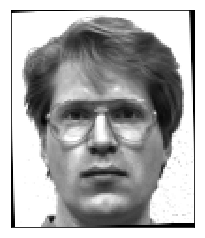

p:  (15, 1)
x:  (11368, 1)
(11368, 1)


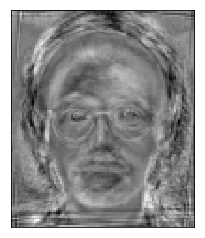

In [9]:
img = X[:,1]
x = img.reshape(D, 1) - muPCA
f3 = plt.imshow(img.reshape(h, w))
    
f3.axes.get_xaxis().set_visible(False)
f3.axes.get_yaxis().set_visible(False)
plt.gray()
plt.show()
p = projectedMatrix.T.dot(x) #projectedMatrix: 11368x15, x: 11368x1 =>p: 15x1 
print("p: ", p.shape)
print("x: ", x.shape)
r = projectedMatrix.dot(p) + muPCA #projectedMatrix: 11368x15, p: 15x1 =>p: 11368x1 
print(r.shape)
#     np.dot(Y, W.T)
f3 = plt.imshow(r.reshape(h, w))
    
f3.axes.get_xaxis().set_visible(False)
f3.axes.get_yaxis().set_visible(False)
plt.gray()
plt.show()

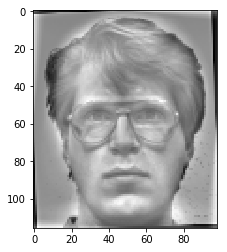

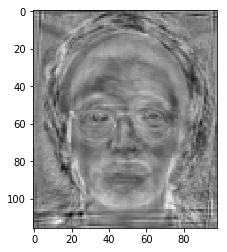

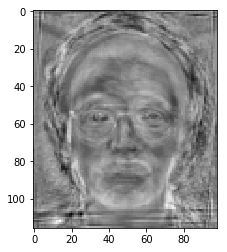

In [22]:
img = X[:,1]
x = img.reshape(D, 1) - muPCA
plt.imshow(x.reshape(h,w))
f3.axes.get_xaxis().set_visible(False)
f3.axes.get_yaxis().set_visible(False)
plt.gray()
plt.show()
for i in range(1):
    p = projectedMatrix[:,i].reshape(-1,1).T.dot(x).reshape(1,1) #projectedMatrix: 11368x1, x: 11368x1 =>p: 1x1 

    r = projectedMatrix[:,i].reshape(-1,1).dot(p).reshape(D,1) #projectedMatrix: 11368x1, p: 1x1 =>r: 11368x1 
    plt.imshow(r.reshape(h,w))
    f3.axes.get_xaxis().set_visible(False)
    f3.axes.get_yaxis().set_visible(False)
    plt.gray()
    plt.show()
    
    r = r + muPCA #projectedMatrix: 11368x1, p: 1x1 =>r: 11368x1 
    plt.imshow(r.reshape(h,w))
    f3.axes.get_xaxis().set_visible(False)
    f3.axes.get_yaxis().set_visible(False)
    plt.gray()
    plt.show()

In [24]:
X_new = coef.transfrom(X)

NameError: name 'coef' is not defined